# 42189 - Transport System Analysis Performance and Operations

# Simple example of car-following model implementation

A line of vehicles are in car following mode and all vehicles are travelling at $18 m/s$ with distance headway of $20 m$. After $5$ seconds, the lead vehicle suddenly decelerates at a rate of $1.2 m/{s^{2}}$ until it stops completely. Implement the model to simulate the behaviour of first following vehicle using a linear car following model (GM). Assume a sensitivity coefficient of $1.2 and a reaction time $0.75 s$.

In [1]:
## Libraries and parameters

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# sensitivity coefficient
coef = 1.2
# reaction time (s)
deltat = 0.75 
# initial speed (m/s)
Vini = 18
# deceleration Rate of the First Vehicle (m/s^2)
rate = -1.2
# initial spacing between vehicles (m)
hini = -20
# number of vehicels ot simulate
N = 10
# total simulation time (s)
T = 30
# leader's breaking moment (s) 
tbreak =  5
# time step for Simulation (s)
Tstep = 0.1

# auxiliary: total number of simulation steps
Nstep = int(T/Tstep)
          


## Simulation loop

In [2]:
# Create an empty list for the simulation clock
t = [i * Tstep for i in range(Nstep)]

# Initialization of Deceleration Matrix, Speed Matrix, Movement Matrix
a = [[0] * Nstep for _ in range(N)]  # Deceleration matrix initialized to zero
v = [[Vini] * Nstep for _ in range(N)]  # Speed matrix initialized to initial speed Vini
d = [[n * hini] for n in range(N)]  # Movement matrix initialized with initial positions spaced by hini

# Loop over all vehicles starting with the leader
for n in range(N):
    for i in range(1, Nstep):
        if n == 0:
            # Leader vehicle
            if i < tbreak / Tstep:
                continue  # Skip time steps before the break time
            elif v[n][i-1] + rate * Tstep > 0:
                v[n][i] = v[n][i-1] + rate * Tstep  # Update speed based on rate
                a[n][i] = rate  # Update acceleration
            else:
                v[n][i] = 0  # Set speed to zero if it would go negative
                a[n][i] = 0  # Set acceleration to zero
        else:
            # Following vehicles
            if i < (deltat / Tstep) * n:
                continue  # Skip time steps before the reaction delay
            elif v[n][i-1] + a[n][i-1] * Tstep > 0:
                a[n][i] = coef * (v[n-1][i-1] - v[n][i-1])  # Calculate acceleration based on the speed difference
                v[n][i] = v[n][i-1] + a[n][i] * Tstep  # Update speed based on acceleration
            else:
                v[n][i] = 0  # Set speed to zero if it would go negative
                a[n][i] = 0  # Set acceleration to zero

# Calculate positions
for n in range(N):
    for i in range(1, Nstep):
        d[n].append(d[n][i-1] + (v[n][i-1] + v[n][i]) / 2 * Tstep)  # Update position based on average speed


1. Plot the space-time diagram.

Text(0, 0.5, 'distance (m)')

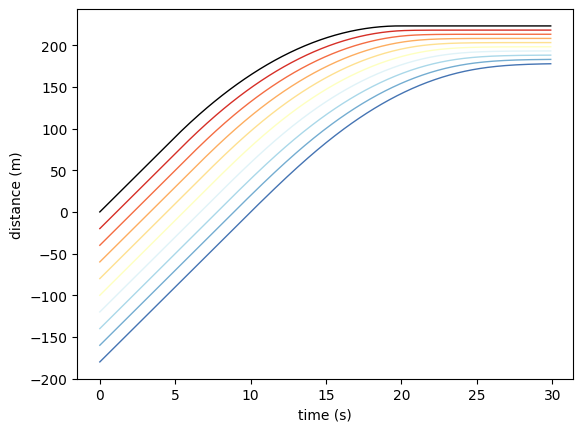

In [3]:
# Plotting
for n in range(0,N):
    if n <= 0: 
        plt.plot(t, d[n], color='black', linewidth=1)
    else:
        plt.plot(t, d[n], color=plt.cm.RdYlBu(n/N), linewidth=1)

plt.xlabel("time (s)")
plt.ylabel("distance (m)")

In [4]:
avg_speed_all = 0  # Initialize the total average speed for all vehicles
tot_time_all = 0  # Initialize the total time for all vehicles

for n in range(0, N):
    # Movement lists of all vehicles
    tot_time = 0  # Initialize the total time for the current vehicle
    veh_speed = []  # Initialize the list to store speeds of the current vehicle

    for i in range(1, Nstep):
        if 0 < d[n][i] < 100:  # Check if the vehicle is within the 0 to 100 meters range
            tot_time += Tstep  # Increment the total time for the current vehicle
            tot_time_all += Tstep  # Increment the total time for all vehicles
            veh_speed.append(v[n][i])  # Append the current speed to the vehicle's speed list

    if tot_time > 0:
        avg_speed = 100 / tot_time  # Method 1 - Calculate time to cross 100 m and get speed
        avg_speed2 = sum(veh_speed) / len(veh_speed) if veh_speed else 0  # Method 2 - Average instantaneous speeds from 0 to 100 m
        print(avg_speed, avg_speed2)  # Print the average speeds for the current vehicle
        avg_speed_all += avg_speed  # Add the average speed to the total average speed

avg = avg_speed_all / N  # Calculate the mean of all speeds using method 1
print(avg)  # Print the mean average speed
print(100 * N / tot_time_all)  # Method 3 - Total distance / total time for all vehicles

18.181818181818194 17.954181818181816
17.85714285714287 17.837163621759704
17.85714285714287 17.715650736890684
17.54385964912282 17.547395849493938
17.24137931034484 17.355092483449223
17.24137931034484 17.176743815519902
16.949152542372897 16.944624654513035
16.666666666666682 16.69388044795154
16.393442622950836 16.427348391312645
16.12903225806453 16.074453383888734
17.206101625597135
17.182130584192276


In [5]:
df_dist = pd.DataFrame(d)
dfd = df_dist.T

In [6]:
dfd

,0,1,2,3,4,5,6,7,8,9
0,0.0,-20.000000,-40.000000,-60.000000,-80.000000,-100.000000,-120.000000,-140.000000,-160.000000,-180.000000
1,1.8,-18.200000,-38.200000,-58.200000,-78.200000,-98.200000,-118.200000,-138.200000,-158.200000,-178.200000
2,3.6,-16.400000,-36.400000,-56.400000,-76.400000,-96.400000,-116.400000,-136.400000,-156.400000,-176.400000
3,5.4,-14.600000,-34.600000,-54.600000,-74.600000,-94.600000,-114.600000,-134.600000,-154.600000,-174.600000
4,7.2,-12.800000,-32.800000,-52.800000,-72.800000,-92.800000,-112.800000,-132.800000,-152.800000,-172.800000
...,...,...,...,...,...,...,...,...,...,...
295,223.2,218.199996,213.199941,208.199519,203.197384,198.189237,193.164243,188.099871,182.956406,177.673281
296,223.2,218.199997,213.199947,208.199570,203.197640,198.190215,193.167242,188.107595,182.973621,177.707257
297,223.2,218.199997,213.199953,208.199615,203.197872,198.191106,193.169999,188.114753,182.989698,177.739222
298,223.2,218.199998,213.199959,208.199656,203.198081,198.191918,193.172532,188.121383,183.004705,177.769280


2. Change the reaction time to $2.0s$. What do you observe?

3. Compute the mean speed for the $[0,100]$ m stretch and $[15,20]$ s period 

4. Change the model so that the leader accelerates again at a rate of $0.5 m/s^2$ right after stopping for $2s$. Plot again the space-time diagram.